In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('Winequality_red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.shape

(1599, 12)

#feature identication says quality is our target variable and rest is our predictors

data doesnot have any categorical values only continous variable with numeric datatypes of float and int

non null say there is no null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


So there is no negative values and there is 0 for citric acid which is acceptable

There is notably a large difference between 75th %tile and max values of predictors “residual sugar”,”free sulfur dioxide”,”total sulfur dioxide”.

Thus observations suggests that there are extreme values-Outliers in our data set.

In [10]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

So out of rating 1 to 10 , we have no values with 1,2,9,10

In [11]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

By this we can judge most of the values are under 5,6,7 quality

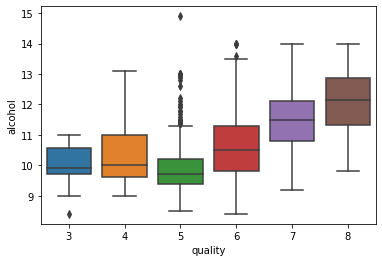

In [12]:
sns.boxplot(x= 'quality' , y='alcohol', data=df)

    

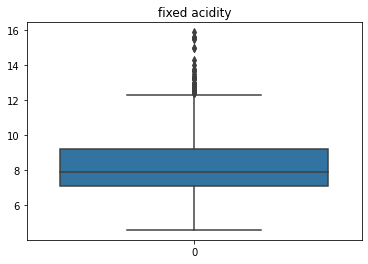

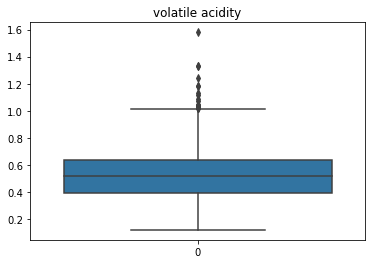

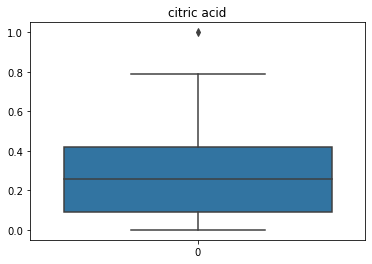

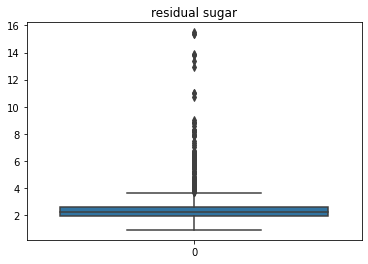

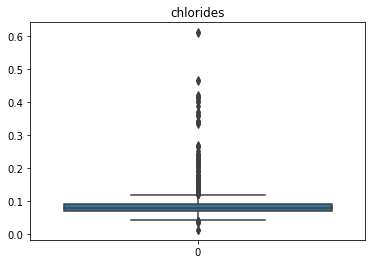

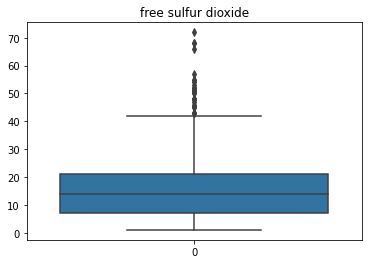

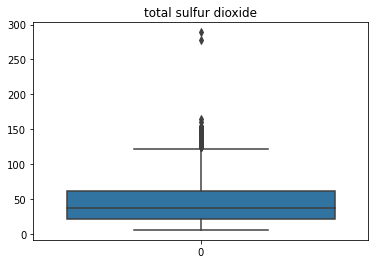

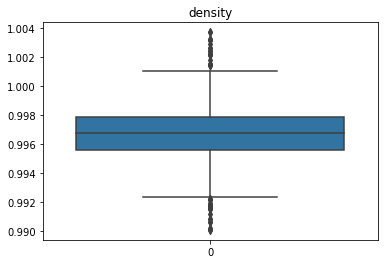

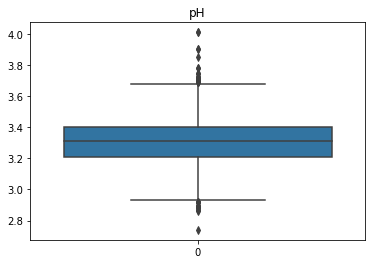

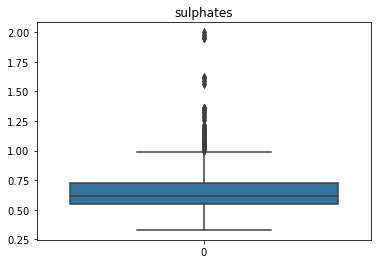

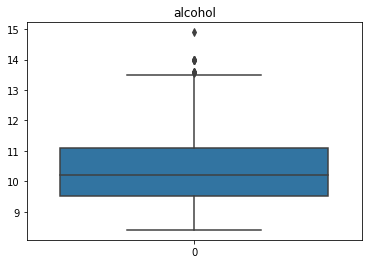

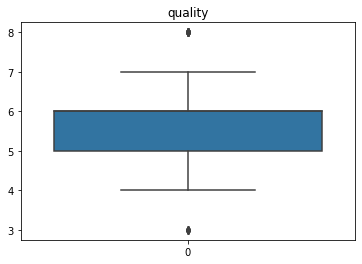

In [13]:
for i in df.columns:
    sns.boxplot(data= df[i])
    plt.title(i)
    plt.show()

Every column has their outliers mainly in maximum

# Density plot to check linearity

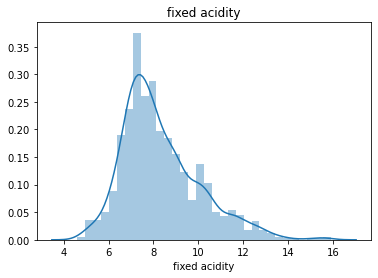

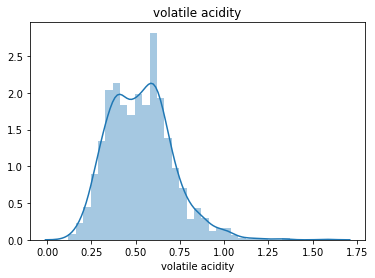

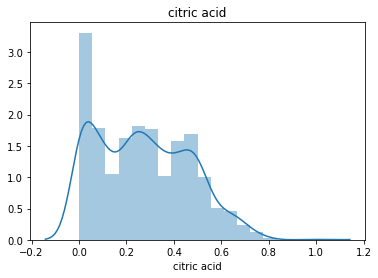

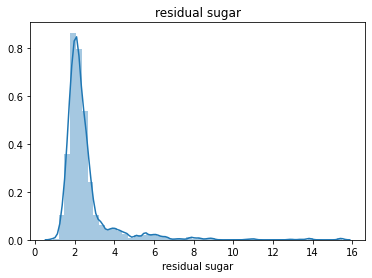

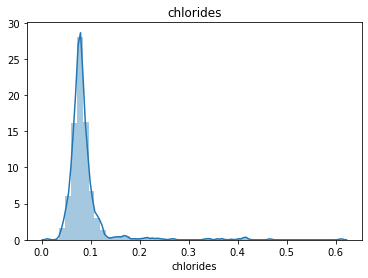

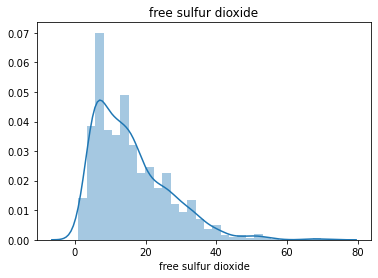

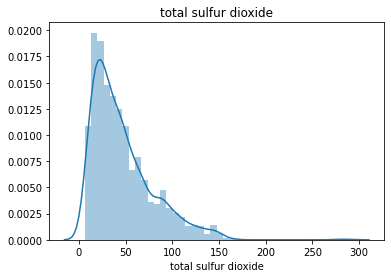

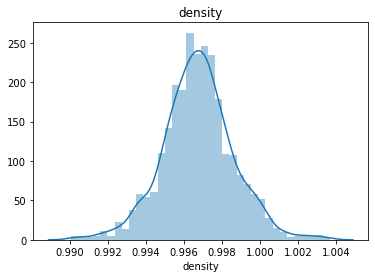

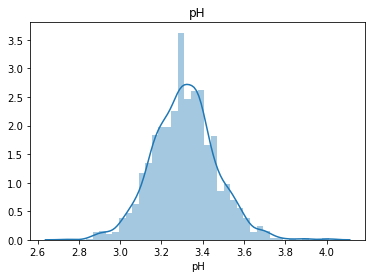

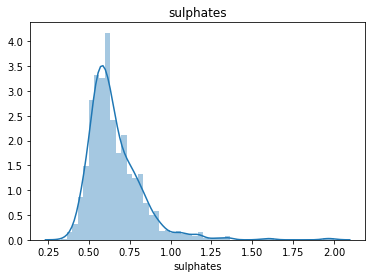

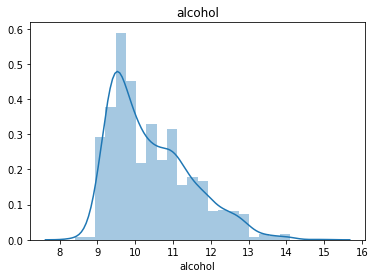

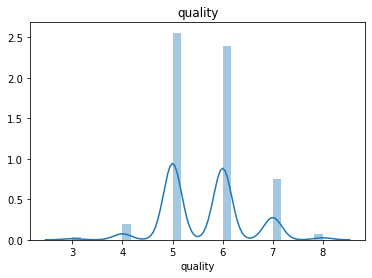

In [14]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

“pH” and "Density" column appears to be normally distributed

remaining all independent variables are right skewed/positively skewed

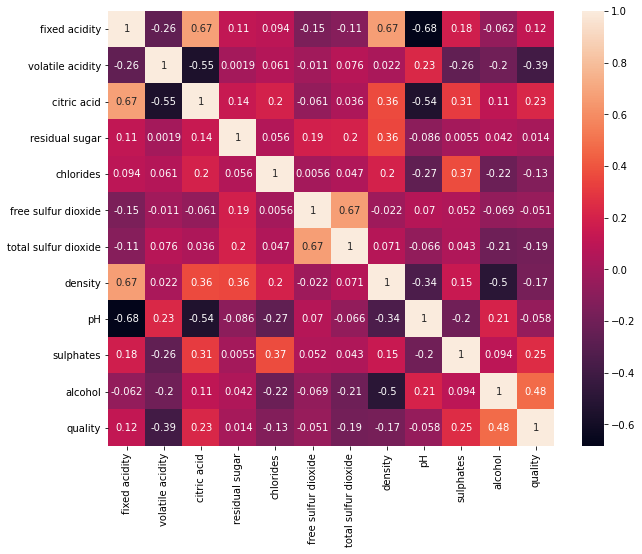

In [15]:
#finding the correlation using heat map.
ax,fig = plt.subplots(figsize=(10,8))
data= df.corr()
sns.heatmap(data, annot=True)
plt.show()

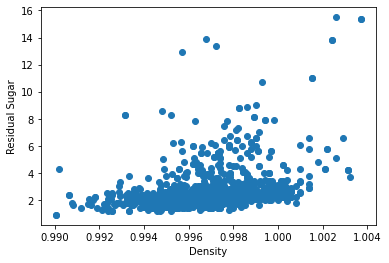

In [16]:
#No as per finding from correlation, checking the scatter plots

plt.scatter(df['density'],df['residual sugar'])
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

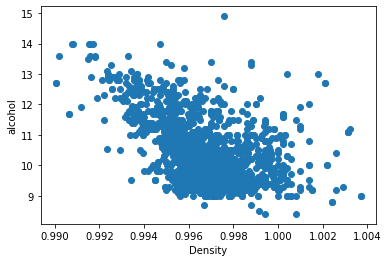

In [17]:
plt.scatter(df['density'],df['alcohol'])
plt.xlabel('Density')
plt.ylabel('alcohol')
plt.show()

In [18]:
out=df.describe(percentiles=[0.05,0.95])

In [19]:
type(out)

pandas.core.frame.DataFrame

In [20]:
out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
5%,6.100000,0.270000,0.000000,1.590000,0.054000,4.000000,11.000000,0.993598,3.060000,0.470000,9.200000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
95%,11.800000,0.840000,0.600000,5.100000,0.126100,35.000000,112.100000,1.000000,3.570000,0.930000,12.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
out.index

Index(['count', 'mean', 'std', 'min', '5%', '50%', '95%', 'max'], dtype='object')

In [22]:
out.drop(['count', 'mean', 'std', 'min', '50%', 'max'], axis=0, inplace=True)

In [23]:
out.drop(['alcohol','quality'], axis=1,inplace=True)

In [24]:
out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
5%,6.1,0.27,0.0,1.59,0.0540,4.0,11.0,0.993598,3.06,0.47
95%,11.8,0.84,0.6,5.10,0.1261,35.0,112.1,1.000000,3.57,0.93


In [25]:
out.loc['5%','density']

0.9935980000000001

In [26]:
for i in out.columns:
    print(df[i].quantile([0.05,.95]))

0.05     6.1
0.95    11.8
Name: fixed acidity, dtype: float64
0.05    0.27
0.95    0.84
Name: volatile acidity, dtype: float64
0.05    0.0
0.95    0.6
Name: citric acid, dtype: float64
0.05    1.59
0.95    5.10
Name: residual sugar, dtype: float64
0.05    0.0540
0.95    0.1261
Name: chlorides, dtype: float64
0.05     4.0
0.95    35.0
Name: free sulfur dioxide, dtype: float64
0.05     11.0
0.95    112.1
Name: total sulfur dioxide, dtype: float64
0.05    0.993598
0.95    1.000000
Name: density, dtype: float64
0.05    3.06
0.95    3.57
Name: pH, dtype: float64
0.05    0.47
0.95    0.93
Name: sulphates, dtype: float64


# Outlier treating with capping and imputing.


i capped them between 5 and 95 th quantile and imputed them with mean value

In [27]:
for i in out.columns:
    fun= (lambda x: x if x>=out.loc['5%',i] and x<=out.loc['95%',i] else df[i].mean() )
    df[i]= df[i].apply(fun)

In [28]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.223156,0.520873,0.251142,2.352827,0.081570,14.963252,43.454301,0.996761,3.309845,0.643465,10.422983,5.636023
std,1.278653,0.133163,0.171276,0.586437,0.013837,7.892686,24.142841,0.001345,0.113640,0.104226,1.065668,0.807569
min,6.100000,0.270000,0.000000,1.600000,0.054000,4.000000,11.000000,0.993600,3.060000,0.470000,8.400000,3.000000
25%,7.200000,0.410000,0.090000,2.000000,0.072000,8.000000,24.000000,0.995860,3.230000,0.560000,9.500000,5.000000
50%,8.100000,0.527821,0.260000,2.200000,0.081000,15.000000,41.000000,0.996747,3.311113,0.630000,10.200000,6.000000
75%,8.900000,0.610000,0.390000,2.538806,0.087467,19.000000,55.000000,0.997600,3.380000,0.700000,11.100000,6.000000
max,11.800000,0.840000,0.600000,5.100000,0.126000,35.000000,112.000000,1.000000,3.570000,0.930000,14.900000,8.000000


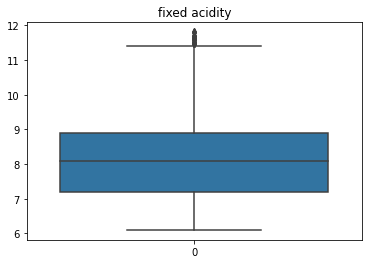

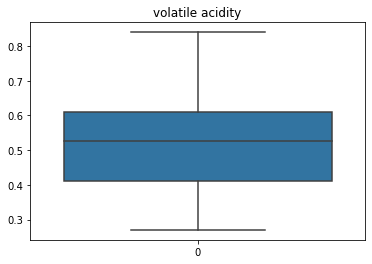

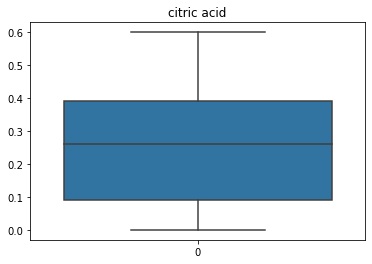

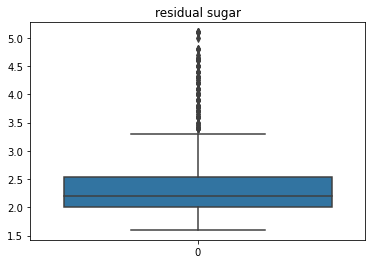

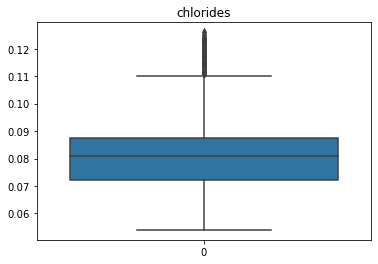

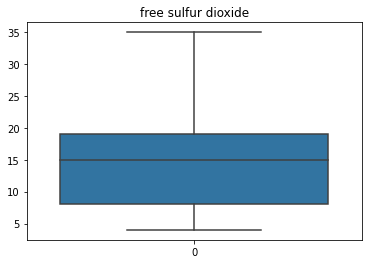

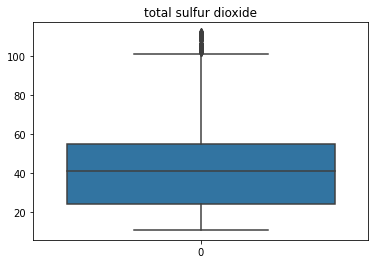

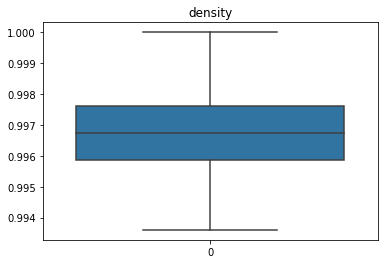

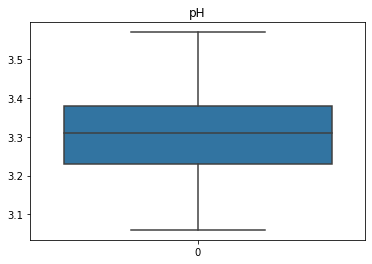

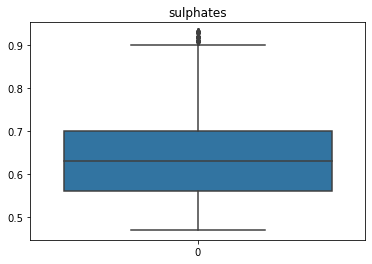

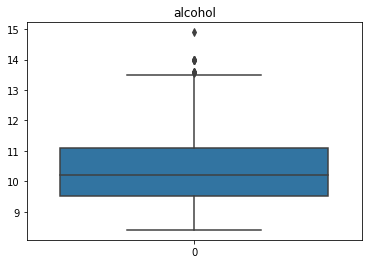

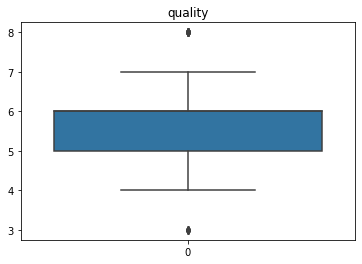

In [29]:
for i in df.columns:
    sns.boxplot(data= df[i])
    plt.title(i)
    plt.show()

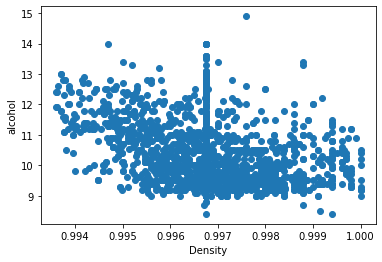

In [30]:
plt.scatter(df['density'],df['alcohol'])
plt.xlabel('Density')
plt.ylabel('alcohol')
plt.show()

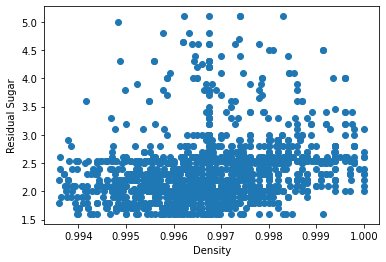

In [31]:
plt.scatter(df['density'],df['residual sugar'])
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

In [32]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [33]:
x= df.loc[:,['fixed acidity', 'volatile acidity','residual sugar',
       'chlorides', 'total sulfur dioxide',
       'pH', 'sulphates', 'alcohol', 'quality']]
y= df.loc[:,'quality']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3, random_state=47)

In [36]:
from sklearn.linear_model import LinearRegression
l= LinearRegression()
l.fit(xtrain,ytrain)

LinearRegression()

In [61]:
l.score(xtest,ytest)

0.8875

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
t= DecisionTreeRegressor(max_depth=5,min_samples_leaf= 20)

In [49]:
t.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)

In [62]:
t.score(xtest,ytest)    #Best Score

0.979737693582476

In [51]:
from sklearn.linear_model import LogisticRegression
l= LogisticRegression()
l.fit(xtrain,ytrain)

LogisticRegression()

In [52]:
l.score(xtest,ytest)

0.8875

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
r= RandomForestClassifier(max_depth=5,min_samples_leaf= 10)

In [55]:
r.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, min_samples_leaf=10)

In [56]:
r.score(xtest,ytest)

0.9333333333333333

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
k= KNeighborsClassifier(n_neighbors=5)

In [59]:
k.fit(xtrain,ytrain)


KNeighborsClassifier()

In [60]:
k.score(xtest,ytest)

0.75625

The Best model so far is Decision Tree Regressor

### Saving Best Model 

In [63]:
import joblib

# Save the model as a pickle in a file
joblib.dump(t,"wine_quality.pkl")

['wine_quality.pkl']